In [1]:
# Cell 1: Import Libraries and model_explainability
%matplotlib inline  
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import logging
import os,sys
import traceback


c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from scripts.model_explainability import load_or_preprocess_data, load_models, explain_logistic_regression, explain_random_forest, run_explainability_pipeline

In [3]:
# Cell 2: Run Explainability Pipeline
data_path = 'c:/Users/HP/Documents/Dagii/Credit-scoring-model/data/transformed_data_credit_scoring.csv'
model_dir = 'c:/Users/HP/Documents/Dagii/Credit-scoring-model/models'  # Use absolute path

save_dir = 'model_explanations'  # Directory to save explanation plots





In [4]:
explanations = run_explainability_pipeline(data_path, model_dir, save_dir)

2025-03-10 11:36:58 - scripts.model_explainability - INFO - Starting explainability pipeline
2025-03-10 11:36:58 - scripts.model_explainability - INFO - Loading or preprocessing data
2025-03-10 11:36:59 - scripts.model_explainability - INFO - Raw data columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Total_Transaction_Amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year', 'Recency', 'RFMS_score', 'Label', 'RFMS_score_binned', 'RFMS_score_binned_WOE', 'ProviderId_WOE', 'ProviderId_WOE.1', 'ProductId_WOE', 'ProductId_WOE.1', 'ProductCategory_WOE', 'ProductCategory_WOE.1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5'] (Count: 37)
2025-03-10 11:36:59 - scripts.model_e

c:\Users\HP\Documents\Dagii\Credit-scoring-model\week-6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-10 11:46:55 - __main__ - INFO - Notebook initialized for model explainability with imported functions
2025-03-10 11:46:55 - scripts.model_explainability - INFO - Starting explainability pipeline
2025-03-10 11:46:55 - scripts.model_explainability - INFO - Loading saved models
2025-03-10 11:46:55 - scripts.model_explainability - INFO - Attempting to load model from: c:/Users/HP/Documents/Dagii/Credit-scoring-model/models\LogisticRegression_best_model.pkl
2025-03-10 11:46:55 - scripts.model_explainability - INFO - Loaded LogisticRegression from c:/Users/HP/Documents/Dagii/Credit-scoring-model/models\LogisticRegression_best_model.pkl
2025-03-10 11:46:55 - scripts.model_explainability - INFO - Attempting to l

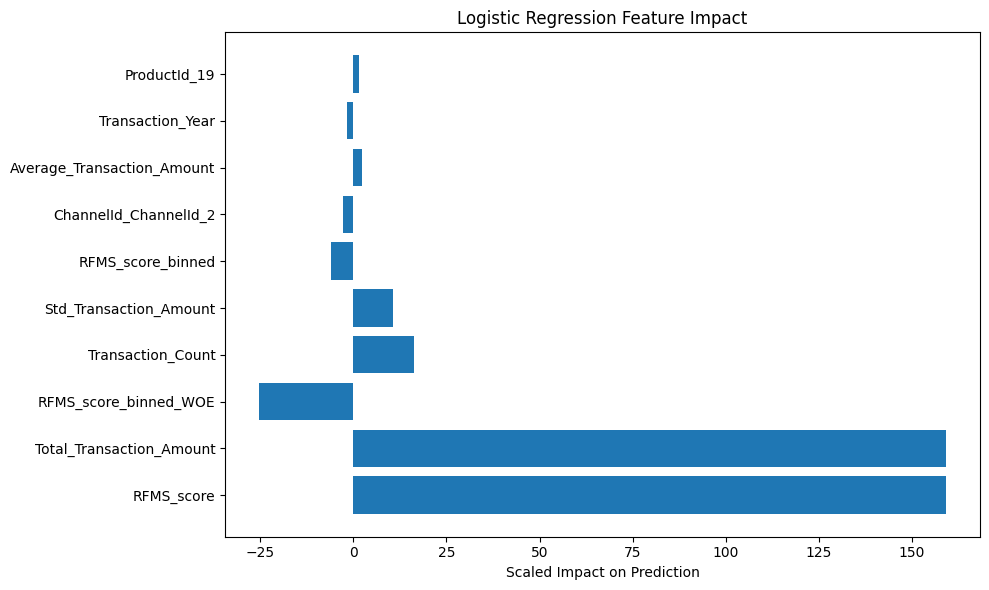

2025-03-10 11:47:00 - scripts.model_explainability - INFO - Explaining Random Forest model
2025-03-10 11:47:00 - scripts.model_explainability - INFO - Top 5 important features for Random Forest:
2025-03-10 11:47:00 - scripts.model_explainability - INFO -                        Feature  Importance
6     Total_Transaction_Amount    0.440932
15                  RFMS_score    0.298707
8            Transaction_Count    0.122874
9       Std_Transaction_Amount    0.046297
7   Average_Transaction_Amount    0.035633



Logistic Regression Explanation:
                       Feature  Coefficient  Scaled_Impact
15                  RFMS_score   159.123160     159.124200
6     Total_Transaction_Amount   159.116968     159.118008
17       RFMS_score_binned_WOE   -25.267907     -25.268073
8            Transaction_Count    16.353044      16.353151
9       Std_Transaction_Amount    10.637086      10.637155
16           RFMS_score_binned    -6.110430      -6.110470
24       ChannelId_ChannelId_2    -2.731304      -2.731322
7   Average_Transaction_Amount     2.222924       2.222939
13            Transaction_Year    -1.619479      -1.619490
45                ProductId_19     1.602235       1.602246


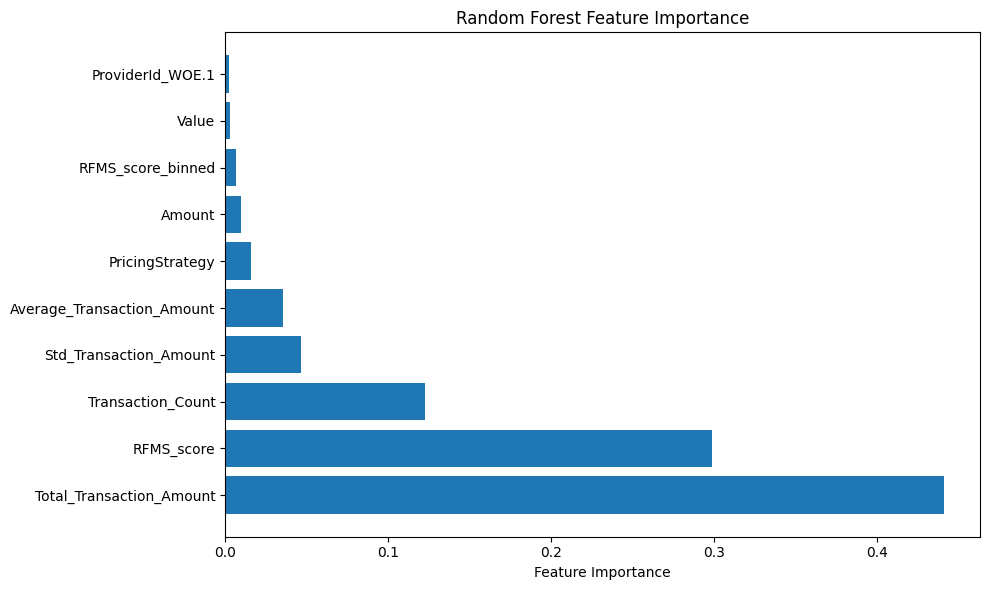

2025-03-10 11:47:36 - scripts.model_explainability - INFO - SHAP values shape: (19133, 52, 2), X_test shape: (19133, 52)
2025-03-10 11:47:36 - scripts.model_explainability - WARNING - Unexpected SHAP values format: <class 'numpy.ndarray'>, shape: (19133, 52, 2)
2025-03-10 11:47:36 - scripts.model_explainability - ERROR - Error explaining Random Forest: Unsupported SHAP output format for binary classification
Traceback (most recent call last):
  File "c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\model_explainability.py", line 331, in explain_random_forest
    raise ValueError("Unsupported SHAP output format for binary classification")
ValueError: Unsupported SHAP output format for binary classification

2025-03-10 11:47:36 - __main__ - INFO - Explainability pipeline executed


In [1]:
# Cell 1: Import Libraries and model_explainability
%matplotlib inline
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import logging
import os,sys
import traceback
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from scripts.model_explainability import load_or_preprocess_data, load_models, explain_logistic_regression, explain_random_forest, run_explainability_pipeline
# Configure logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)
logger = logging.getLogger(__name__)

base_dir = os.getcwd()
log_dir = os.path.join(base_dir, 'logs')
os.makedirs(log_dir, exist_ok=True)

info_handler = logging.FileHandler(os.path.join(log_dir, 'explainability_info.log'))
info_handler.setLevel(logging.INFO)
error_handler = logging.FileHandler(os.path.join(log_dir, 'explainability_error.log'))
error_handler.setLevel(logging.ERROR)

formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
info_handler.setFormatter(formatter)
error_handler.setFormatter(formatter)

logger.addHandler(info_handler)
logger.addHandler(error_handler)

logger.info("Notebook initialized for model explainability with imported functions")

# Cell 2: Run Explainability Pipeline
data_path = 'c:/Users/HP/Documents/Dagii/Credit-scoring-model/data/transformed_data_credit_scoring.csv'
model_dir = 'c:/Users/HP/Documents/Dagii/Credit-scoring-model/models'  # Use absolute path

save_dir = 'model_explanations'  # Directory to save explanation plots

explanations = run_explainability_pipeline(data_path, model_dir, save_dir)
logger.info("Explainability pipeline executed")